In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
plt.style.use('seaborn')


from sklearn.datasets import load_iris, load_digits

Populating the interactive namespace from numpy and matplotlib


### Load our dataset

In [2]:
iris = load_iris(as_frame=True)

X = iris.data
y = iris.target

In [3]:
# digits = load_digits(as_frame=True)

# X = digits.data
# y = digits.target

# K nearest Neighbors

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
# 1 - Import the library
from sklearn.neighbors import KNeighborsClassifier

In [6]:
# 2 - Create an instance of the model
knn = KNeighborsClassifier(n_neighbors=5)

In [7]:
# 3 - Fit the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

It's likely that the model overfits the data when number of neighbors used are low.

We can estimate the accuracy of the classifier on future data, using the test data

In [8]:
print(f'Train score: {knn.score(X_train, y_train).round(3)}')
print(f'Test score: {knn.score(X_test, y_test).round(3)}')

Train score: 0.991
Test score: 0.895


As we got higher train score than test score, we are probably overfitting data.

In [9]:
# Predictions
knn.predict(X_test)

array([1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 1,
       0, 2, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1])

In [10]:
np.array(y_test)

array([1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1,
       0, 2, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1])

Predictions and the actual value of y_test are very similar. Our predictor classifier is pretty damn accurate

> ### How sensitive is KNN classification accuracy to the choice of "k" parameter

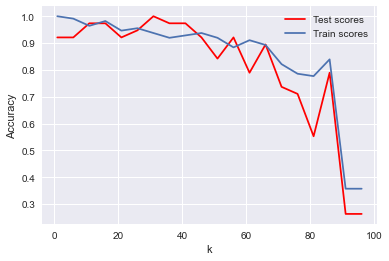

In [11]:
def k_sensitivity():

    k_range = range(1, 100, 5)
    test_scores = []
    train_scores = []

    for k in k_range:

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        test_score = knn.score(X_test, y_test)
        train_score = knn.score(X_train, y_train)
        test_scores.append(test_score)
        train_scores.append(train_score)

    plt.plot(k_range, test_scores, label='Test scores', c='r')
    plt.plot(k_range, train_scores, label='Train scores')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.legend()
    
    
    
k_sensitivity()

> ### How sensitive is KNN classification accuracy to the train_test_split proportion

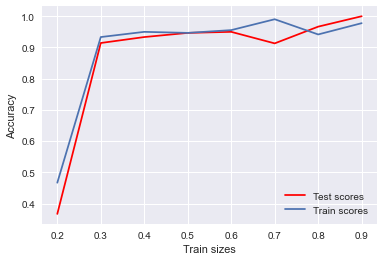

In [12]:
def split_sensitivity(k=20):

    proportions = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

    knn = KNeighborsClassifier(n_neighbors=k)
    test_scores = []
    train_scores = []

    for train_size in proportions:

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-train_size))
        knn.fit(X_train, y_train)
        test_score = knn.score(X_test, y_test)
        train_score = knn.score(X_train, y_train)
        test_scores.append(test_score)
        train_scores.append(train_score)

    plt.plot(proportions, test_scores, label='Test scores', c='r')
    plt.plot(proportions, train_scores, label='Train scores')
    plt.xlabel('Train sizes')
    plt.ylabel('Accuracy')

    plt.legend()
    
    
split_sensitivity()    

# Linear models for Classification

## Logistic Regression & Support Vector Machine (SVM)
Logistic function is as follows:
$$\sigma(t) = \frac{e^t}{1 + e^t}\$$

In [13]:
def plot_logistic_function(start, stop, num):
    """Plots the logistic regression function given a specific 'np_linspace'"""
    
    x = np.linspace(start, stop, num)
    y = (np.exp(x)) / (1 + np.exp(x))
    
    plt.plot(x, y, c='b')

    plt.title('Logistic Function')
    plt.xlabel('x axis')
    plt.ylabel('y axis')

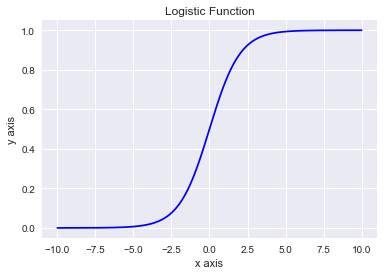

In [14]:
plot_logistic_function(-10, 10, 1000)

Let's get to the dataset!

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC

In [16]:
logreg = LogisticRegression().fit(X_train, y_train)
linear_svc = LinearSVC().fit(X_train, y_train)
svc = SVC(kernel='linear').fit(X_train, y_train)

C:\Users\Javi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


For these two models, the trade-off parameter that determines the strength of the regularization is *C*. Higher values of *C* correspond to *less regularization*. The higher the value of C, the better the model tries to fit the training sets. **High values of C are likely to overfit the data.**

In [17]:
print(f'Train score: {logreg.score(X_train, y_train).round(3)}')
print(f'Test score: {logreg.score(X_test, y_test).round(3)}')

Train score: 1.0
Test score: 0.921


In [18]:
print(f'Train score: {linear_svc.score(X_train, y_train).round(3)}')
print(f'Test score: {linear_svc.score(X_test, y_test).round(3)}')

Train score: 0.991
Test score: 0.868


In [19]:
print(f'Train score: {svc.score(X_train, y_train).round(3)}')
print(f'Test score: {svc.score(X_test, y_test).round(3)}')

Train score: 1.0
Test score: 0.921


# Naive Bayes
This classifier is widely used in *Text Classification*, *Spam Filtering*, and *Sentiment Analysis* (in Social Media to identify positive and negative customer sentiments).

Naive Bayes is an eager learning classifier and it is sure fast. Thus, it could be used for making predictions in real time.

When to use it:
- Text Classification
- When dataset is huge
- When you have small training set

### Types of Naive Bayes Classifier
* Multinomial [sklearn doc](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)
* Bernoulli [sklearn doc](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)
* Gaussian [sklearn doc](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

[Naive Bayes tutorial](https://towardsdatascience.com/all-about-naive-bayes-8e13cef044cf)

In [20]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

naive_bayes = MultinomialNB().fit(X_train, y_train)
bernoulli = BernoulliNB().fit(X_train, y_train)
gaussian = GaussianNB().fit(X_train, y_train)

In [21]:
# Multinomail Naive-Bayes: assumes count data (that each feature represents an integer count of something, like how often a word appears in a sentence)

print(f'Train score: {naive_bayes.score(X_train, y_train).round(3)}')
print(f'Test score: {naive_bayes.score(X_test, y_test).round(3)}')

Train score: 0.696
Test score: 0.605


In [22]:
# Bernoulli: assumes binary data

print(f'Train score: {bernoulli.score(X_train, y_train).round(3)}')
print(f'Test score: {bernoulli.score(X_test, y_test).round(3)}')

Train score: 0.366
Test score: 0.237


In [23]:
# Gaussian: can be applied to any continuous data
# It is mostly used on very high-dimensional data

print(f'Train score: {gaussian.score(X_train, y_train).round(3)}')
print(f'Test score: {gaussian.score(X_test, y_test).round(3)}')

Train score: 0.973
Test score: 0.895
